In [1]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
from settings import SimulationSetup
from helper import create_df, fluence_cm2, eloss_MeV, run_igk, get_hpc, let_keV_um

In [3]:
simulation_setup = SimulationSetup()
simulation_setup.start_E_MeV_u = 30.
simulation_setup.stop_E_MeV_u = 60.
simulation_setup.num_E_MeV_u = 4

In [4]:
simulation_setup

SimulationSetup(particle_name='1H', dose_gy=0.3, material_name='Aluminum Oxide', er_model_name='ER_Edmund', rdd_model_name='RDD_Geiss', gamma_response_model_name='GR_GeneralTarget', stopping_power_source_name='PSTAR', slab_thickness_um=100.0, saturation_cross_section_factor=1.4, r=44.0, smax=27.6, d01=2.9, c1=1.0, m1=1.0, d02=4.66, c2=2.0, m2=1.0, start_E_MeV_u=30.0, stop_E_MeV_u=60.0, num_E_MeV_u=4)

In [5]:
df = create_df(simulation_setup)

In [6]:
df

,E_MeV_u,a0_m
0,30.0,9.500000e-08
1,30.0,5.000000e-08
2,30.0,1.500000e-07
3,40.0,9.500000e-08
4,40.0,5.000000e-08
5,40.0,1.500000e-07
6,50.0,9.500000e-08
7,50.0,5.000000e-08
8,50.0,1.500000e-07
9,60.0,9.500000e-08


In [7]:
fluence_cm2(df.E_MeV_u.iloc[-1], simulation_setup)

NameError: name 'libam' is not defined

In [ ]:
eloss_MeV(df.E_MeV_u.iloc[-1], simulation_setup)

0.3418019484712447

In [ ]:
run_igk(df.E_MeV_u.iloc[5], df.a0_m.iloc[5], simulation_setup)

([0.9969867952194085],
 [1.2204779172679376],
 [1.2241665818646525],
 [1.7374990554114948e-12],
 [0.29947327321278805],
 [0.9997244795045568],
 [0.9980214011519071])

In [ ]:
get_hpc(df.E_MeV_u.iloc[-1], df.a0_m.iloc[-1], simulation_setup)

1.2219400200527477

In [ ]:
df['HPC'] = df.apply(lambda df_tmp : get_hpc(df_tmp.E_MeV_u, df_tmp.a0_m, simulation_setup), axis=1)

In [ ]:
df['let_keV_um'] = df.apply(lambda df_tmp : let_keV_um(df_tmp.E_MeV_u, simulation_setup), axis=1)

In [ ]:
df

,E_MeV_u,a0_m,HPC,let_keV_um
0,30.0,9.500000e-08,1.209785,5.882310
1,30.0,5.000000e-08,1.179428,5.882310
2,30.0,1.500000e-07,1.217488,5.882310
3,40.0,9.500000e-08,1.215277,4.687187
4,40.0,5.000000e-08,1.195776,4.687187
5,40.0,1.500000e-07,1.220096,4.687187
6,50.0,9.500000e-08,1.217801,3.936722
7,50.0,5.000000e-08,1.203642,3.936722
8,50.0,1.500000e-07,1.221274,3.936722
9,60.0,9.500000e-08,1.219240,3.418019


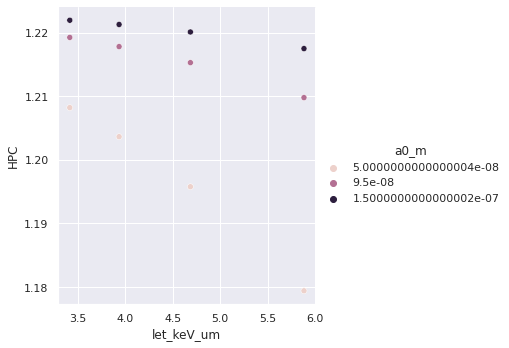

In [ ]:
sns.relplot(x='let_keV_um', y='HPC', hue='a0_m', data=df)